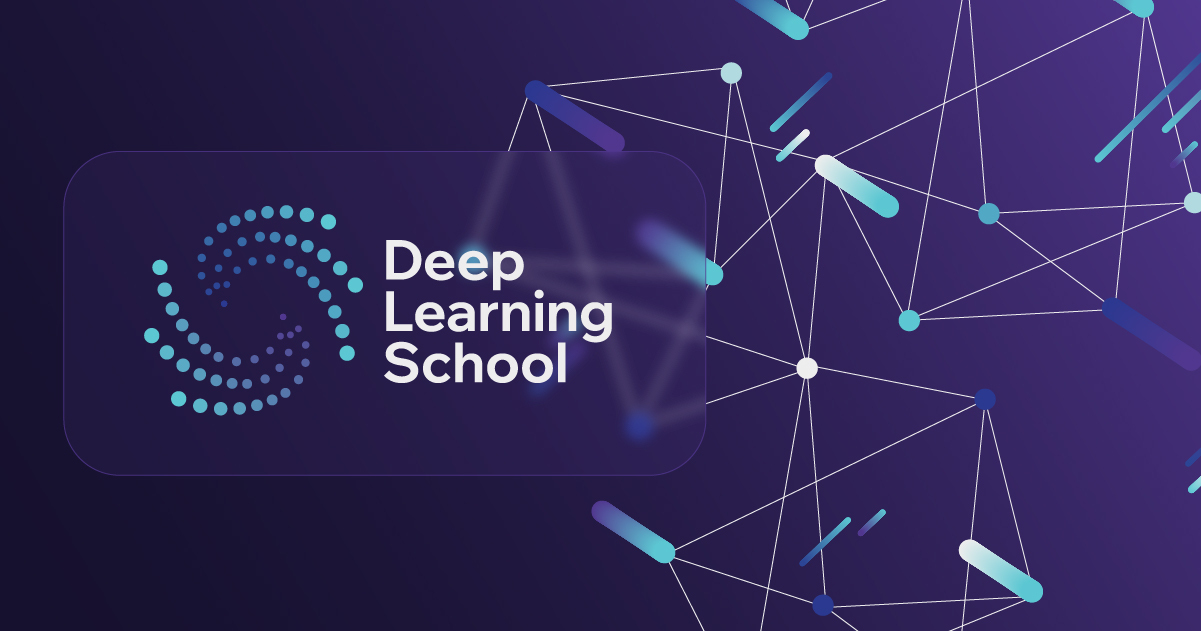

In [1318]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

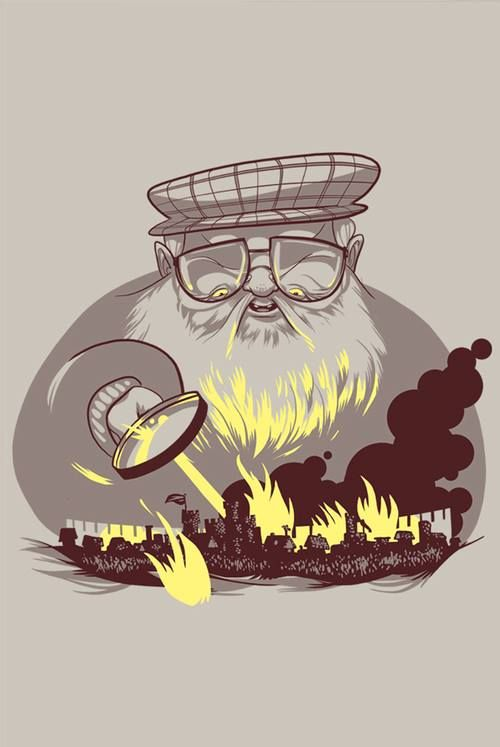

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1319]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 62.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 95.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [1321]:
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
test_df = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [1322]:
df.loc[69]

,69
name,Racallio Ryndoon
title,NaN
male,1
culture,Tyroshi
dateOfBirth,NaN
mother,NaN
father,NaN
heir,NaN
house,Kingdom of the Three Daughters
spouse,NaN


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


<Axes: ylabel='S.No'>

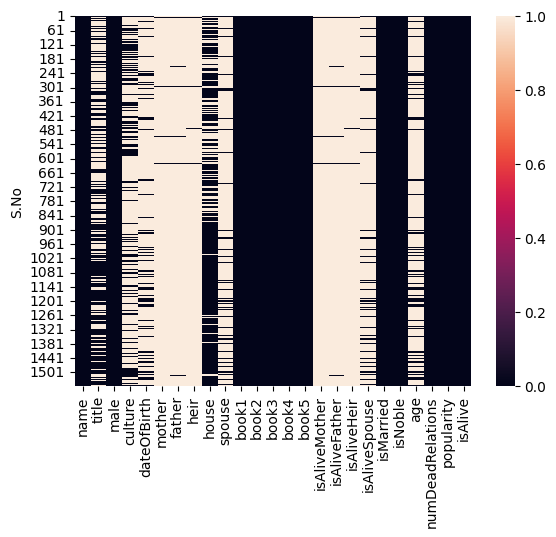

In [1323]:
print(df.isnull().sum())
sns.heatmap(df.isnull())
#проверил кол-во NaN

In [1324]:
print(df.shape)

(1557, 25)


In [1325]:
nan = df.isnull().sum() / len(df) * 100
print(nan)
print(type(nan))
#кол-во NaN в процентах

name                 0.000000
title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
mother              98.843931
father              98.587026
heir                98.651252
house               24.470135
spouse              87.154785
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother       98.843931
isAliveFather       98.587026
isAliveHeir         98.651252
isAliveSpouse       87.154785
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64
<class 'pandas.core.series.Series'>


In [1326]:
nan_counts = df.isna().sum()
columns_to_delete = nan_counts[nan_counts > 1300].index.tolist()

df = df.drop(columns=columns_to_delete)

test_df=test_df.drop(columns=columns_to_delete)
#удалил столбцы там где более 1300 NaN

In [1327]:
df['age'] = df['age'].fillna(df['age'].mean())
df['dateOfBirth'] = df['dateOfBirth'].fillna(df['dateOfBirth'].mean())
df['title'] = df['title'].fillna('NoTitle')
df['culture'] = df['culture'].fillna('NoCulture')
df['house'] = df['house'].fillna('NoHouse')

test_df['age'] = test_df['age'].fillna(df['age'].mean())
test_df['dateOfBirth'] = test_df['dateOfBirth'].fillna(df['dateOfBirth'].mean())
test_df['title'] = test_df['title'].fillna('NoTitle')
test_df['culture'] = test_df['culture'].fillna('NoCulture')
test_df['house'] = test_df['house'].fillna('NoHouse')

df['Age+Birth']=df['age']+df['dateOfBirth']
df = df.drop(columns='age')
df = df.drop(columns='dateOfBirth')

test_df['Age+Birth']=test_df['age']+test_df['dateOfBirth']
test_df = test_df.drop(columns='age')
test_df = test_df.drop(columns='dateOfBirth')
#заполнил средним возраст и год рождения, титл культур и хаус заполнил что нет. сделал новый признак date+age

In [1328]:
df.head()

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,Age+Birth
S.No,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NoTitle,1,NoCulture,NoHouse,0,0,0,0,0,0,0,11,0.605351,0,282.842294
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,0.896321,1,305.000000
3,Addison Hill,Ser,1,NoCulture,House Swyft,0,0,0,1,0,0,1,0,0.267559,1,282.842294
4,Aemma Arryn,Queen,0,NoCulture,House Arryn,0,0,0,0,0,1,1,0,0.183946,0,105.000000
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,0,0.043478,1,305.000000


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [1329]:
import pandas as pd
import numpy as np
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_pairs = (
    corr_matrix.where(mask)
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)
top_15_pairs = corr_pairs_sorted.head(15).drop(columns='AbsCorrelation')
print(top_15_pairs)
#посмотрел топ 15 самых коррелирующих между собой признаков, потому очень херово если они сильно коррелируют между собой. понял что нумдед и популярити слишком сильно коррелируют

            Feature1    Feature2  Correlation
60  numDeadRelations  popularity     0.613759
21             book2       book3     0.380968
30             book3       book4     0.329153
38             book4       book5     0.302338
65           isAlive   Age+Birth     0.287298
43             book4     isAlive     0.284014
11             book1       book2     0.278116
53         isMarried  popularity     0.241898
31             book3       book5     0.226547
44             book4   Age+Birth     0.209901
61  numDeadRelations     isAlive    -0.198876
63        popularity     isAlive    -0.194187
18             book1  popularity     0.186818
29             book2   Age+Birth     0.184801
37             book3   Age+Birth     0.181808


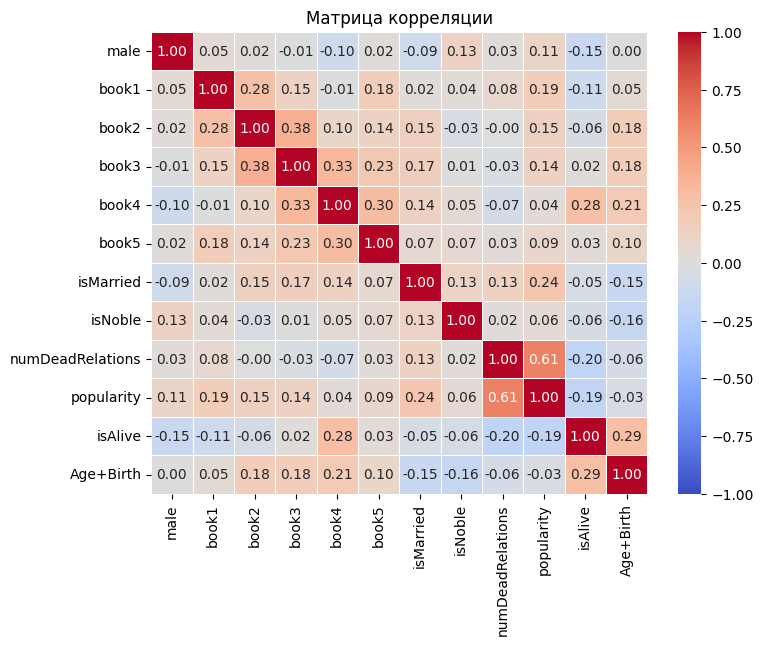

In [1330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

#матрица корреляции числовых признаков. можно заметить, что довольно логично, что на живость перса влияет эйдж+дата рождения

In [1331]:
df['isPopular'] = (df['popularity'] >= 0.5).astype(int)
df=df.drop(columns=['popularity'])


df['boolDeadRelations'] = df['numDeadRelations'] > 0
df['boolDeadRelations'] = df['boolDeadRelations'].astype(int)
df = df.drop(columns='numDeadRelations')


test_df['isPopular'] = (test_df['popularity'] >= 0.5).astype(int)
test_df=test_df.drop(columns=['popularity'])


test_df['boolDeadRelations'] = test_df['numDeadRelations'] > 0
test_df['boolDeadRelations'] = test_df['boolDeadRelations'].astype(int)
test_df = test_df.drop(columns='numDeadRelations')
#преобразовал в бинарные признаки

In [1332]:
df = df.drop(columns='boolDeadRelations')
test_df = test_df.drop(columns='boolDeadRelations')
#дропнул булдед потому что сильно коррелирует с ис популар

In [1333]:
nan = df.isnull().sum() / len(df) * 100
print(nan)
print(type(nan))
#проверка на всякий на наличие NaN

name         0.0
title        0.0
male         0.0
culture      0.0
house        0.0
book1        0.0
book2        0.0
book3        0.0
book4        0.0
book5        0.0
isMarried    0.0
isNoble      0.0
isAlive      0.0
Age+Birth    0.0
isPopular    0.0
dtype: float64
<class 'pandas.core.series.Series'>


In [1334]:
df.head(10)

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,Age+Birth,isPopular
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NoTitle,1,NoCulture,NoHouse,0,0,0,0,0,0,0,0,282.842294,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,305.000000,1
3,Addison Hill,Ser,1,NoCulture,House Swyft,0,0,0,1,0,0,1,1,282.842294,0
4,Aemma Arryn,Queen,0,NoCulture,House Arryn,0,0,0,0,0,1,1,0,105.000000,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,1,305.000000,0
6,Tommen Baratheon,NoTitle,1,NoCulture,NoHouse,0,0,0,0,0,0,0,1,282.842294,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,House Targaryen,0,0,0,0,0,1,1,0,209.000000,0
8,Viserys I Targaryen,NoTitle,1,NoCulture,NoHouse,0,0,0,0,0,0,0,0,282.842294,1
9,Wilbert,Ser,1,NoCulture,NoHouse,0,0,1,0,0,0,1,0,282.842294,0


In [1335]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [1336]:
culture_mapping = {}
for main_culture, variants in cult.items():
    for variant in variants:
        culture_mapping[variant.strip().lower()] = main_culture
def unify_culture(culture):
    if pd.isna(culture):
        return culture
    culture = str(culture).strip().lower()
    return culture_mapping.get(culture, 'NoCulture')
df['culture'] = df['culture'].apply(unify_culture)
test_df['culture'] = test_df['culture'].apply(unify_culture)

#как и дали в подсказке, я обобщил похожие названия культур в один общий класс эквивалентности, ведь по сути это одно и то же, чаще всего в другой форме или разного пола

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [1337]:
# df.drop(columns=['isNoble'], inplace = True)
# df.drop(columns=['isMarried'], inplace = True)
df.drop(columns=['title'], inplace = True)

# test_df.drop(columns=['isMarried'], inplace = True)
# test_df.drop(columns=['isNoble'], inplace = True)
test_df.drop(columns=['title'], inplace = True)

#эксперементировал с дропами, посмотрев топ15 самых коррелирующих пар признаков(это потом внизу)
#решил дропнуть title потому что почти все титлы имеют корреляцию 1.0 к хаусам, что наталкивает на мысль
#что почти все титулы полностью совпадают с их домами. плюс есть признак isNoble, так что титл вообще не нужен

In [1338]:
df.head()

,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,Age+Birth,isPopular
S.No,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,NoCulture,NoHouse,0,0,0,0,0,0,0,0,282.842294,1
2,Walder Frey,1,NoCulture,House Frey,1,1,1,1,1,1,1,1,305.000000,1
3,Addison Hill,1,NoCulture,House Swyft,0,0,0,1,0,0,1,1,282.842294,0
4,Aemma Arryn,0,NoCulture,House Arryn,0,0,0,0,0,1,1,0,105.000000,0
5,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,1,305.000000,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [1339]:
df['isAlive'].value_counts()

#чекнул таргет. вообще не сбалансированный датасет. хотел поэтому накинуть веса, возможно на момент отправки пока ты мой любимый друг
#это проверяешь, я уже залил новую версию с уменьшенными весами, но пока мне лень)) дел и так много, а 5 баллов есть

,count
isAlive,
1,1212
0,345


In [1340]:
df.drop(columns=['name'], inplace=True)
test_df.drop(columns=['name'], inplace=True)
#очевидно дропаем имя

In [1341]:
threshold = 0.005
for col in ['house', 'culture']:
    freq = df[col].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index.tolist()
    df[col] = df[col].apply(lambda x: 'Rare' if x in rare_categories else x)
    test_df[col] = test_df[col].apply(lambda x: 'Rare' if x in rare_categories else x)

#честно говоря вообще это очень нужно делать, но на мой скор почти не влияло. но короче
#если есть очень редкие титулы, их лучше объединять в один rare признак. я его так и назвал
#иначе при ohe(one hot encoder) будет слишком много признаков, чего делать нежелательно

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [1342]:
from sklearn.preprocessing import OneHotEncoder
encoders = {
    'house': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
    'culture': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
    # 'title': OneHotEncoder(handle_unknown='ignore', sparse_output=False)
}
for col, encoder in encoders.items():
    encoded_train = encoder.fit_transform(df[[col]])
    cols = encoder.get_feature_names_out([col])
    df = pd.concat([df.drop(columns=[col]),
                    pd.DataFrame(encoded_train, columns=cols, index=df.index)],
                   axis=1)
for col, encoder in encoders.items():
    encoded_test = encoder.transform(test_df[[col]])
    cols = encoder.get_feature_names_out([col])
    test_df = pd.concat([test_df.drop(columns=[col]),
                         pd.DataFrame(encoded_test, columns=cols, index=test_df.index)],
                        axis=1)

#он самый, OHE. корреляцию я уже проверял, ты видел вверху кода. и снизу я еще раз ее проверяю

In [1343]:
import pandas as pd
import numpy as np
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_pairs = (
    corr_matrix.where(mask)
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)
top_15_pairs = corr_pairs_sorted.head(15).drop(columns='AbsCorrelation')
print(top_15_pairs[['Feature1', 'Feature2', 'Correlation']])
#опять-таки, даже с операцией Rare признаков оч много, поэтому матрица корреляции выглядит ужасно. поэтому я снова вывел топ15 пар самых коррелирующих признаков
#можно заметить, что корреляция мала, что довольно хорошо.

                  Feature1               Feature2  Correlation
796      house_House Stark       culture_Northmen     0.600822
980      culture_NoCulture       culture_Northmen    -0.553975
375              Age+Birth  house_House Targaryen    -0.483763
924          house_NoHouse             house_Rare    -0.473625
970      culture_Free Folk      culture_NoCulture    -0.402029
87                   book2                  book3     0.380968
736  house_House Lannister      culture_Westermen     0.347518
957       culture_Braavosi      culture_NoCulture    -0.337980
928          house_NoHouse      culture_Free Folk     0.331325
129                  book3                  book4     0.329153
795      house_House Stark      culture_NoCulture    -0.322503
170                  book4                  book5     0.302338
324                isAlive              Age+Birth     0.287298
173                  book4                isAlive     0.284014
313                isNoble             house_Rare     0

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [1344]:
#бро, ну ты же видел что я делал это сверху. просто так легче, тем более я проверял все признаки, я сначала запустил весь код
#а потом сверху запустил таблицу, которая показала корреляцию всех признаков. было сложно, но я сделал из нее вывода
#так что я сделал это задание) просто сделал это в ячейке выше

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [1345]:
X = df.drop(columns=['isAlive'])

y = df['isAlive']
#очев, по определению, объяснять не буду. просто разделил на признаки и таргет

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [1346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
#ну тоже довольно просто, разделил на тест и трейн чтобы чекать скоры на тесте

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [1347]:
from sklearn.linear_model import LogisticRegression
#ну импортировал

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [1348]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#ну импортировал побольше

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [1349]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Process": GaussianProcessClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

#проверил все модельки, +- одно и то же(кроме наивного байеса потому что это давно нерабочее старье)

0.7916666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7852564102564102
0.8237179487179487
0.8237179487179487
0.38782051282051283
0.8044871794871795
0.782051282051282
0.782051282051282


In [1350]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#лучший оказался методом К ближайших соседей, что в целом логично. но вообще оно лучше работает на взвешенных классах, так как датасет несбалансированный
#возможно я уже это сделал кто знает

0.8044871794871795


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [1351]:
y_test_pred = model.predict(test_df)
submission = pd.DataFrame({
    'S.No': test_df.index,
    'isAlive': y_test_pred
})

submission.to_csv('submission.csv', index=False)

print("Предсказания сохранены в submission.csv")
print("Пример предсказаний:\n", submission.head(3))

#сохранил ответ че. внизу можешь не смотреть, я там эти строчки закомментил, потому что все задания снизу и даже больше я сделал выше
#ты наверняка это заметил))
#желаю удачи друг мой. не хмурь бровей из-за ударов рока. упавший духом - гибнет раньше срока :)

Предсказания сохранены в submission.csv
Пример предсказаний:
    S.No  isAlive
0  1558        0
1  1559        1
2  1560        1


В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [1352]:
#!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [1353]:
#submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [1354]:
#submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [1355]:
#submission.to_csv("/content/new_submission.csv", index=False)